# Evaluation and Visualisation of Results for `snx` on MTS

In [1]:
import argparse
import joblib
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil
import sys
import seaborn as sns
import tensorflow as tf

from itertools import cycle
from numpy import interp
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from tensorflow import keras

from astronet.constants import astronet_working_directory as asnwd
from astronet.preprocess import one_hot_encode
from astronet.utils import astronet_logger, load_dataset

In [2]:
from astronet.visualise_results import plot_acc_history, plot_confusion_matrix, plot_loss_history, plot_multiROC

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.serif": ["Computer Modern Roman"]})

mpl.style.use("seaborn")

In [4]:
architecture = "snX"

In [5]:
datasets = [
        "ArabicDigits",
        "AUSLAN",
        "CharacterTrajectories",
        "CMUsubject16",
        "ECG",
        "JapaneseVowels",
        "KickvsPunch",
        "Libras",
        "NetFlow",
        "UWave",
        "Wafer",
        "WalkvsRun",
]

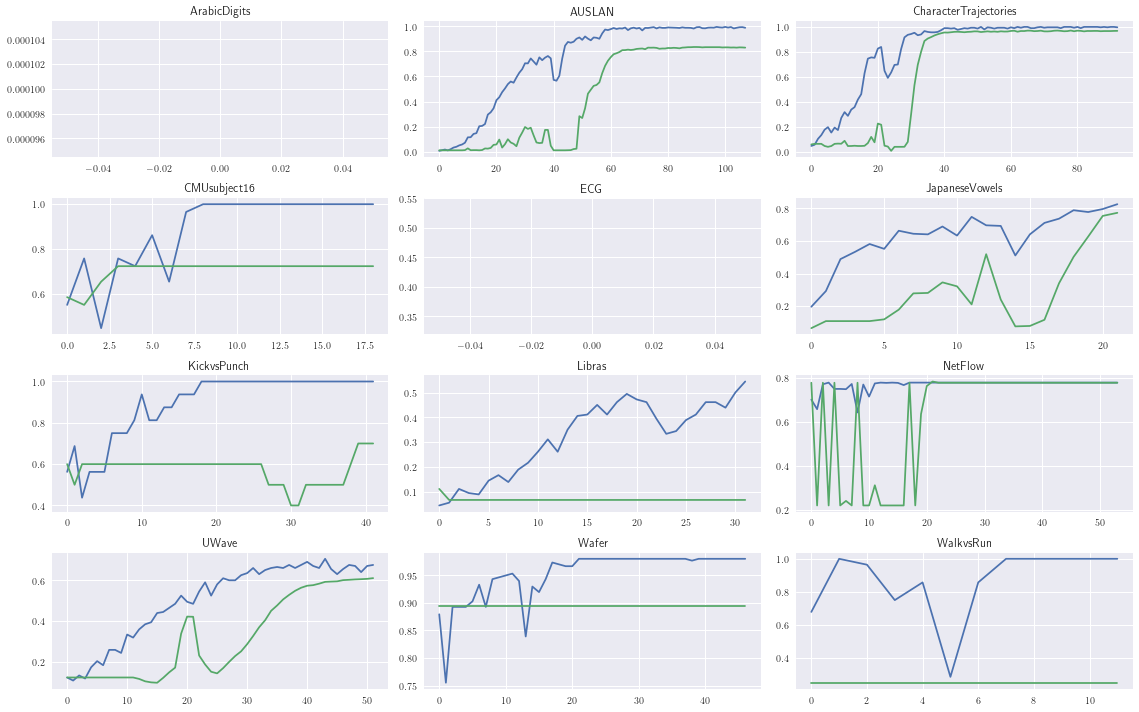

In [6]:
# Create figure with subplot
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 10))
# Show the image data in a subplot
for i, ax in enumerate(axs.flatten()):
    X_train, y_train, X_test, y_test, loss = load_dataset(datasets[i])
    
    with open(f"{asnwd}/astronet/{architecture}/models/{datasets[i]}/results.json") as f:
        events = json.load(f)
    
    # Get params for best model with lowest loss
    event = min(events['training_result'], key=lambda ev: ev['loss'])
    
    model_name = event['name']
    plot_acc_history(datasets[i], model_name, event, save=False, ax=ax)

# Show the figure on the screen
plt.tight_layout()
plt.show()

In [7]:
plt.clf()

<Figure size 576x396 with 0 Axes>

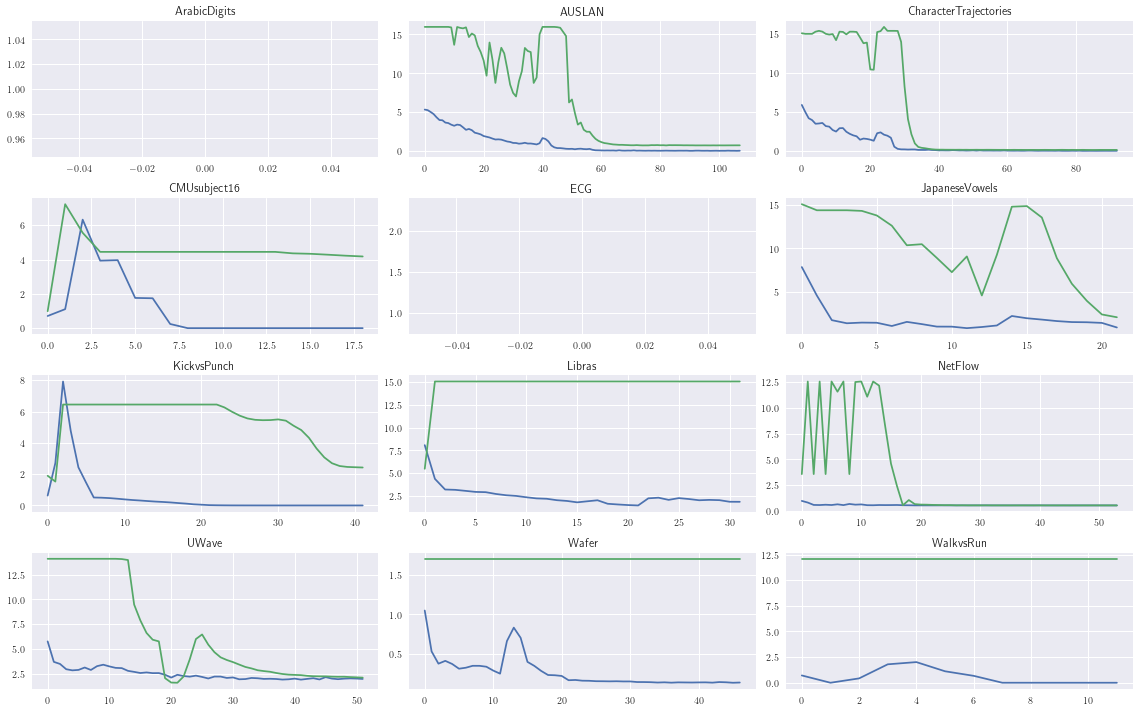

In [8]:
# Create figure with subplot
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 10))
# Show the image data in a subplot
for i, ax in enumerate(axs.flatten()):
    X_train, y_train, X_test, y_test, loss = load_dataset(datasets[i])
    
    with open(f"{asnwd}/astronet/{architecture}/models/{datasets[i]}/results.json") as f:
        events = json.load(f)
    
    # Get params for best model with lowest loss
    event = min(events['training_result'], key=lambda ev: ev['loss'])
    
    model_name = event['name']
    plot_loss_history(datasets[i], model_name, event, save=False, ax=ax)

# Show the figure on the screen
plt.tight_layout()
plt.show()

In [10]:
table = {}
for dataset in datasets:
    print(f"{dataset}")

    X_train, y_train, X_test, y_test, loss = load_dataset(dataset)
    
    with open(f"{asnwd}/astronet/{architecture}/models/{dataset}/results.json") as f:
        events = json.load(f)
    
    # Get params for best model with lowest loss
    event = min(events['training_result'], key=lambda ev: ev['loss'])
    
    model_name = event['name']
    
    table[f"{dataset}"] = event["model_evaluate_on_test_acc"]
    
#     model = keras.models.load_model(f"{asnwd}/astronet/{architecture}/models/{dataset}/model-{model_name}")
    
#     y_pred = model.predict(X_test)
    
#     with open(f"{asnwd}/data/{dataset}.encoding", "rb") as eb:
#         encoding = joblib.load(eb)
        
#     class_encoding = encoding.categories_[0]

#     if dataset == "plasticc":
#         class_names = list(np.vectorize(class_mapping.get)(class_encoding))
#     else:
#         class_names = class_encoding
#         y_true = encoding.inverse_transform(y_test)
        
#     print(np.unique(y_true))
#     print(class_names)
        
#     plot_confusion_matrix(
#         dataset,
#         model_name,
#         encoding.inverse_transform(y_test),
#         encoding.inverse_transform(y_pred),
#         class_names,  # enc.categories_[0]
#         save=False,
#     )
    
#     plot_multiROC(dataset, model_name, model, X_test, y_test, class_names, save=False)
print(table)
# # Show the figure on the screen
# plt.tight_layout()
# plt.show()

ArabicDigits
AUSLAN
CharacterTrajectories
CMUsubject16
ECG
JapaneseVowels
KickvsPunch
Libras
NetFlow
UWave
Wafer
WalkvsRun
{'ArabicDigits': 0.0001, 'AUSLAN': 0.8336842060089111, 'CharacterTrajectories': 0.9644253253936768, 'CMUsubject16': 0.7241379022598267, 'ECG': 0.33000001311302185, 'JapaneseVowels': 0.2108108103275299, 'KickvsPunch': 0.4000000059604645, 'Libras': 0.06666667014360428, 'NetFlow': 0.779026210308075, 'UWave': 0.5762038230895996, 'Wafer': 0.8939732313156128, 'WalkvsRun': 0.25}


In [11]:
df = pd.DataFrame.from_dict(table, orient='index')
df.columns = ([f"{architecture}"])
df

,snX
ArabicDigits,0.000100
AUSLAN,0.833684
CharacterTrajectories,0.964425
CMUsubject16,0.724138
ECG,0.330000
JapaneseVowels,0.210811
KickvsPunch,0.400000
Libras,0.066667
NetFlow,0.779026
UWave,0.576204


In [12]:
filename = f"{os.environ['ASNWD']}/results/mts-{architecture}-results.csv"

In [13]:
df.to_csv(filename)